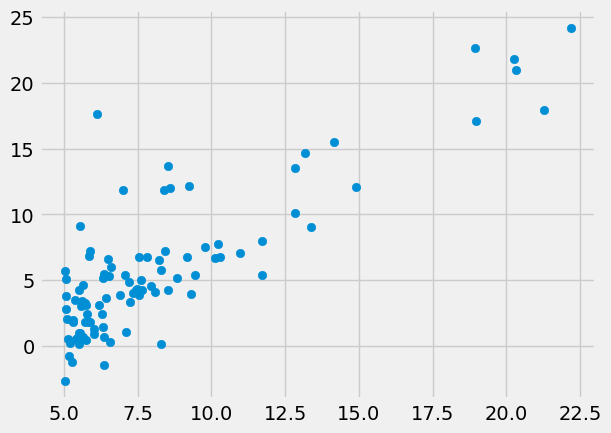

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

from matplotlib import style
style.use('fivethirtyeight')


df = '/home/balerion/Desktop/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex1/data/ex1data1.txt'

cols = np.loadtxt(df , delimiter=',' , usecols=(0,1) , unpack=True)

Xs = np.transpose(np.array(cols[:-1]))
Ys = np.transpose(np.array(cols[-1:]))

plt.scatter(Xs , Ys)
plt.show()

# Y = mX + b

m (best_fit) = mean(X) * mean(Y) - mean(X*Y) / square(mean(X)) - mean(square(X))

b (best_fit) = mean(y) - m* mean(X)

In [40]:
def best_fit_slope(Xs, Ys):
    n = len(Xs)
    m = (n * np.sum(Xs * Ys) - np.sum(Xs) * np.sum(Ys)) / (n * np.sum(Xs**2) - np.sum(Xs)**2)
    return m

def best_fit_intercept(Xs  ,Ys):
    m = best_fit_slope(Xs , Ys)
    b = (np.mean(Ys) - m*np.mean(Xs))
    return b



m = best_fit_slope(Xs , Ys)
b = best_fit_intercept(Xs , Ys)
print(m,b)



1.1930336441895943 -3.8957808783118573


In [33]:
# xs = np.array([1,2,3,4,5,6] , dtype=np.float64)
# ys = np.array([5,4,6,5,6,7] , dtype=np.float64)

# best_fit_intercept(xs , ys)


4.0

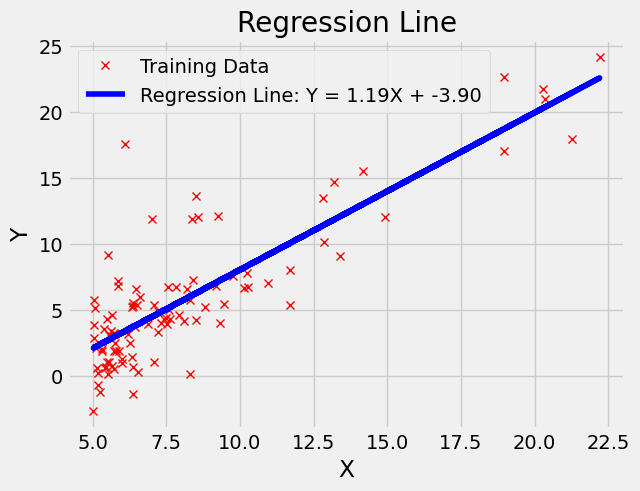

In [49]:
regression_line = [(m*x)+b for x in Xs]
plt.plot(Xs , Ys , 'rx' , label = "Training Data")
plt.plot(Xs, regression_line, 'b-', label=f'Regression Line: Y = {m:.2f}X + {b:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression Line')
plt.legend()
plt.show()